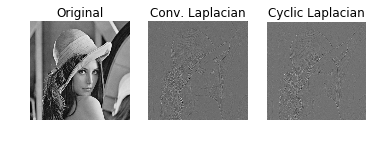

In [145]:
import numpy as np
from scipy import misc
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
lena = sp.misc.lena()
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0,  -1, 0]])
laplaced = signal.convolve2d(lena, laplacian, boundary='symm', mode='same')


class Lapstream(object):
    def __init__(self, buffsz):
        self._empty_slots = buffsz
        self._buffsz = buffsz
        self._buffer = np.zeros(buffsz)
        self._midpoint = buffsz // 2
    
    @property
    def filled(self):
        return self._empty_slots <= 0
    
    def append(self, value):
        self._buffer = np.roll(self._buffer, 1)
        self._buffer[0] = value
        self._empty_slots = max(self._empty_slots -1, 0)
    def laplace(self):
        return 4 * self._buffer[self._midpoint] - self._buffer[0]\
                 - self._buffer[self._midpoint - 1] - self._buffer[self._midpoint + 1]\
                 - self._buffer[-1]
    def log(self):
        print(self._buffer)
    

ls = Lapstream(lena.shape[0]*2+1)
count = 0
processed = []
for p in np.nditer(lena):
    ls.append(p)
    if ls.filled:
        processed.append(ls.laplace())
cyclic = np.array(processed, dtype=int).reshape(510,512)

#Plot deets
fig, (ax_orig, ax_lap, ax_cyc) = plt.subplots(1, 3)
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_orig.imshow(lena, cmap='gray')
ax_lap.set_title('Conv. Laplacian')
ax_lap.set_axis_off()
ax_lap.imshow(laplaced, cmap='gray')
ax_cyc.set_title('Cyclic Laplacian')
ax_cyc.set_axis_off()
ax_cyc.imshow(cyclic, cmap='gray')